# new WS calibration check through bumps

Data of 15 october morning

- double check the timestamps with Jose

In [1]:
%run myToolbox.py

Version 0.03. This is the latest version.
Please help me to improve it reporting bugs to guido.sterbini@cern.ch.
Your platform is Linux-3.10.0-693.11.6.el7.x86_64-x86_64-with-redhat-6.10-Carbon
Your folder is /eos/user/e/esenes/Emittance-accuracy-measurement
Your IP is 172.17.0.16
2018-10-23 10:39:18


In [2]:
# %run /eos/project/l/liu/Toolbox/myToolbox.py
print '---'
%run /eos/user/e/esenes/PS-analysis-tools/eTools.py
print '---'

---
Version 0.1
Use at your own risk. Please report bugs to eugenio.senes@cern.ch
Fork it at https://gitlab.cern.ch/esenes/PS-analysis-tools
---


# User inputs

In [3]:
matlabVars = ['PR_BPM.AcquisitionOrbit.value.position', # BPMs
                'PR_BPM.AcquisitionOrbit.value.channelNames',
                'PR_BCT_ST.Samples.value.samples'
             ]

In [45]:
def gimme_df(filenames, ampl):
    df = myToolbox.fromMatlabToDataFrame(filenames,matlabVars,verbose=False)
    df['Bump_mm'] = ampl
    return df

files0 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/n2mm/*.mat'))
df0 = gimme_df(files0, -2.)
files1 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/n1mm/*.mat'))[1:]
df1 = gimme_df(files1, -1.)
files2 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/0mm/*.mat'))[1:]
df2 = gimme_df(files2, 0.)
files3 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/1mm/*.mat'))[1:]
df3 = gimme_df(files3, 1.)
files4 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/2mm/*.mat'))[1:]
df4 = gimme_df(files4, 2.)
files5 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/3mm/*.mat'))[1:]
df5 = gimme_df(files5, 3.)
files6 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/4mm/*.mat'))[1:]
df6 = gimme_df(files6, 4.)

In [91]:
def gimme_df(filenames, ampl):
    df = myToolbox.fromMatlabToDataFrame(filenames,matlabVars,verbose=False)
    df['Bump_mm'] = ampl
    return df

files0 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/n2mm/*.mat'))
df0 = gimme_df(files0, -2.)
files1 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/n1mm/*.mat'))
df1 = gimme_df(files1, -1.)
files2 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/0mm/*.mat'))
df2 = gimme_df(files2, 0.)
files3 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/1mm/*.mat'))
df3 = gimme_df(files3, 1.)
files4 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/2mm/*.mat'))
df4 = gimme_df(files4, 2.)
files5 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/3mm/*.mat'))
df5 = gimme_df(files5, 3.)
files6 = sorted(glob.glob('/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.15_bump_LIU/4mm/*.mat'))
df6 = gimme_df(files6, 4.)

In [92]:
myDataFrame = pnd.concat([df0,df1,df2,df3,df4,df5,df6])

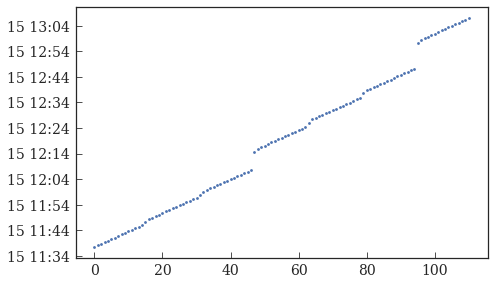

In [93]:
plt.plot(myDataFrame.index,'.')

# Intensity

In [94]:
myDataFrame['Intensity'] = myDataFrame['PR_BCT_ST.Samples.value.samples']
myDataFrame['Intensity'] = myDataFrame['Intensity'].apply(lambda x: np.mean(x[500:900]))

# BPMs

In [95]:
myDataFrame['PR_BPM.AcquisitionOrbit.value.position'] = myDataFrame['PR_BPM.AcquisitionOrbit.value.position'].apply(lambda x: 0.1*x)

In [96]:
myDataFrame['Bump_amplitude'] = myDataFrame['PR_BPM.AcquisitionOrbit.value.position'].apply(lambda x: np.mean(x[22, 500:900]))

# Import Jose's data from Matlab

In [97]:
# import to dict
matlabVars2 = ['Sigmas_IN','Sigmas_OUT','Centres_IN','Centres_OUT','InfoData_CycleName']
new_WS_data = scipy.io.loadmat('/eos/user/e/esenes/Emittance-accuracy-measurement/new_WS_bumps/Summary_Processed.mat', squeeze_me=True, struct_as_record=False)
# fix the casting for the timestamps
liuTs = []
for k in range(263):    
    ts = new_WS_data['InfoData_CycleName'][k]
    ts_unix = time.mktime(datetime.datetime.strptime(str(ts), '%Y.%m.%d.%H.%M.%S.%f').timetuple())
#     ts_unix += 3 #acquisition offset
    liuTs.append(myToolbox.unixtime2datetime(ts_unix))
# import to dataframe
LIU_df = pnd.DataFrame([],index=liuTs)

LIU_df['Sigmas_IN'] = [np.empty(4,dtype=float)]*len(LIU_df)
LIU_df['Sigmas_OUT'] = [np.empty(4,dtype=float)]*len(LIU_df)
LIU_df['Centre_IN'] = [np.empty(4,dtype=float)]*len(LIU_df)
LIU_df['Centre_OUT'] = [np.empty(4,dtype=float)]*len(LIU_df)

for k, l in enumerate(LIU_df.index):
    LIU_df['Sigmas_IN'].loc[l] = new_WS_data['Sigmas_IN'][k]
    LIU_df['Sigmas_OUT'].loc[l] = new_WS_data['Sigmas_OUT'][k]
    LIU_df['Centre_IN'].loc[l] = new_WS_data['Centres_IN'][k]
    LIU_df['Centre_OUT'].loc[l] = new_WS_data['Centres_OUT'][k]
    
# UTC time fix --> go all in local time
LIU_df.index = LIU_df.index + pnd.DateOffset(hours=2, seconds=3, milliseconds=900) 

# head/tail chop
LIU_df = LIU_df.drop(LIU_df.iloc[127:].index,axis=0)
LIU_df = LIU_df.drop(LIU_df.iloc[:11].index,axis=0)

In [115]:
# manual adjustment of the data not matching ...
LIU_df = LIU_df.drop(LIU_df.loc['2018-10-15 12:12:55.900000'].name)
LIU_df = LIU_df.drop(LIU_df.loc['2018-10-15 12:14:07.900000'].name)
LIU_df = LIU_df.drop(LIU_df.loc['2018-10-15 12:15:19.900000'].name)

myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-15 12:14:40.300000'].name)

LIU_df = LIU_df.drop(LIU_df.loc['2018-10-15 12:50:43.900000'].name)
LIU_df = LIU_df.drop(LIU_df.loc['2018-10-15 12:52:31.900000'].name)
LIU_df = LIU_df.drop(LIU_df.loc['2018-10-15 12:57:55.900000'].name)

myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-15 12:57:16.300000'].name)


In [119]:
myDataFrame['Sigmas_IN'] = [np.empty(4,dtype=float)]*len(myDataFrame)
myDataFrame['Sigmas_OUT'] = [np.empty(4,dtype=float)]*len(myDataFrame)
myDataFrame['Centre_IN'] = [np.empty(4,dtype=float)]*len(myDataFrame)
myDataFrame['Centre_OUT'] = [np.empty(4,dtype=float)]*len(myDataFrame)

for k in range(len(myDataFrame)):
    if (myDataFrame.index[k] == LIU_df.index[k]):
        myDataFrame['Sigmas_IN'].iloc[k] = LIU_df['Sigmas_IN'].iloc[k]
        myDataFrame['Sigmas_OUT'].iloc[k] = LIU_df['Sigmas_OUT'].iloc[k]
        myDataFrame['Centre_IN'].iloc[k] = LIU_df['Centre_IN'].iloc[k]
        myDataFrame['Centre_OUT'].iloc[k] = LIU_df['Centre_OUT'].iloc[k]
    else:
        print(k)
        myDataFrame['Sigmas_IN'].iloc[k] = np.nan
        myDataFrame['Sigmas_OUT'].iloc[k] = np.nan
        myDataFrame['Centre_IN'].iloc[k] = np.nan
        myDataFrame['Centre_OUT'].iloc[k] =np.nan

15
31
62
78


# Finally the plot 

In [156]:
# data grabber for arrays with nans
def sig(x, idx):
    try:
        return x[idx]
    except:
        return x
# linear fitting
from scipy.optimize import curve_fit
def lin(x, a, b):
    return a + b*x

In [154]:
# bad shots LIU WS
myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-15 13:00:55.900'].name)
myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-15 11:39:19.900'].name)

In [176]:
from scipy import stats
stats.linregress(x0, yy)


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

(array([ 1.,  1.]), array([[ inf,  inf],
        [ inf,  inf]]))

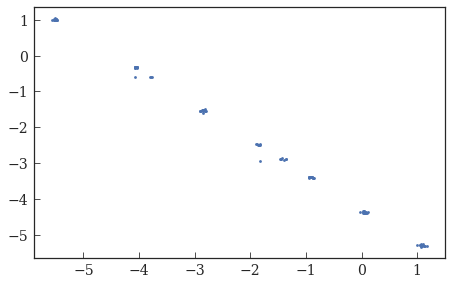

In [179]:
plt.plot(x0, yy,'.')
curve_fit(lin, x0, yy )


In [180]:
x0


2018-10-15 11:37:31.900    1.119285
2018-10-15 11:38:07.900    1.129658
2018-10-15 11:38:43.900    1.068901
2018-10-15 11:39:55.900    1.134846
2018-10-15 11:40:31.900    1.172816
2018-10-15 11:41:07.900    1.000141
2018-10-15 11:41:43.900    1.080559
2018-10-15 11:42:19.900    1.045581
2018-10-15 11:42:55.900    1.062101
2018-10-15 11:43:31.900    1.058781
2018-10-15 11:44:07.900    1.101060
2018-10-15 11:44:43.900    1.074954
2018-10-15 11:45:19.900    1.079050
2018-10-15 11:45:55.900    1.081981
2018-10-15 11:47:04.300         NaN
2018-10-15 11:48:19.900    0.046366
2018-10-15 11:48:55.900    0.083438
2018-10-15 11:49:31.900   -0.033495
2018-10-15 11:50:07.900    0.020092
2018-10-15 11:50:43.900    0.024862
2018-10-15 11:51:19.900    0.083290
2018-10-15 11:51:55.900    0.099327
2018-10-15 11:52:31.900    0.052668
2018-10-15 11:53:07.900    0.021315
2018-10-15 11:53:43.900    0.052232
2018-10-15 11:54:19.900    0.057175
2018-10-15 11:54:55.900    0.117118
2018-10-15 11:55:31.900    0

(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)


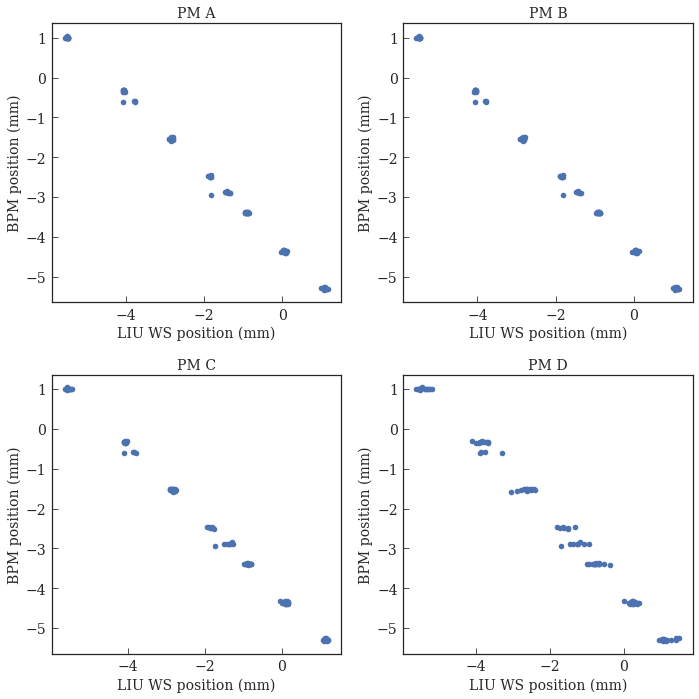

In [174]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

x0 = myDataFrame['Centre_IN'].apply(lambda x : sig(x,0))
x1 = myDataFrame['Centre_IN'].apply(lambda x : sig(x,1))
x2 = myDataFrame['Centre_IN'].apply(lambda x : sig(x,2))
x3 = myDataFrame['Centre_IN'].apply(lambda x : sig(x,3))
yy = myDataFrame['Bump_amplitude']

def print_subplot(ax_obj, row, col, xdata, ydata, title):
    # plotting 
    ax_obj[row,col].set_title(title)
    ax_obj[row,col].plot(xdata, ydata,'o')
    ax_obj[row,col].set_xlabel('LIU WS position (mm)')
    ax_obj[row,col].set_ylabel('BPM position (mm)')
    # fitting 
#     popt, pcov = curve_fit(lin, xdata, ydata )
#     print(title)
#     print(popt, np.sqrt(np.diag(pcov)))
#     ax_obj[row,col].plot(xdata, lin(xdata, *popt),'-')
    slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
    print(slope, intercept, r_value)

    
print_subplot(ax, 0, 0, x0, yy, 'PM A' )
print_subplot(ax, 0, 1, x1, yy, 'PM B' )
print_subplot(ax, 1, 0, x2, yy, 'PM C' )
print_subplot(ax, 1, 1, x3, yy, 'PM D' )

fig.tight_layout()

# Export for Jose